In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [319]:
df = pd.read_csv("..//data//dataset_properti_medan_raw_2.csv")
print(df.shape)
df.head(5)

(9346, 9)


,nama,lokasi,harga,jenis_properti,jumlah_kamar_tidur,jumlah_kamar_mandi,garasi,luas_tanah,luas_bangunan
0,Ruko Komersial Strategis Jual Murah,"Medan Johor, Medan","Rp 2,5 Miliar Total",Ruko,NaN,3.0,NaN,64 m²,210 m²
1,Dijual Ruko Murah Jalan Katamso Komplek Prima ...,"Medan Maimun, Medan","Rp 1,15 Miliar Total",Ruko,NaN,4.0,NaN,72 m²,192 m²
2,"Di Jual Villa Mutiara Poit, Jl. Meteorologi Vi...","Medan Tembung, Medan",Rp 900 Juta,Rumah,2,3.0,1.0,56 m²,100 m²
3,"Rumah Bagus Dipusat Kota, Harga Miring, Banyak...","Medan Baru, Medan","Rp 3,7 Miliar",Rumah,5,5.0,2.0,350 m²,300 m²
4,Ruko 3 Lantai Lokasi Sangat Strategis di H Yam...,"Medan Timur, Medan","Rp 2,8 Miliar Total",Ruko,NaN,1.0,NaN,101 m²,267 m²


In [320]:
print(df[df['jumlah_kamar_mandi'].astype(str).str.contains('m²', na=False)].shape)
print(df[df['jumlah_kamar_tidur'].astype(str).str.contains('m²', na=False)].shape)
print(df[df['garasi'].astype(str).str.contains('m²', na=False)].shape)

(0, 9)
(0, 9)
(0, 9)


In [321]:
def clean_harga(harga_str):
    if pd.isna(harga_str):
        return None
    
    harga_str = harga_str.lower().replace('rp', '').replace('total', '').replace('/m²', '').strip()
    
    harga_str = harga_str.replace(',', '.')
    
    multiplier = 1
    
    if 'miliar' in harga_str:
        multiplier = 1_000_000_000
        harga_str = harga_str.replace('miliar', '').strip()
    elif 'juta' in harga_str:
        multiplier = 1_000_000
        harga_str = harga_str.replace('juta', '').strip()
    
    try:
        angka = float(harga_str)
        return angka * multiplier
    except:
        return None

df['harga'] = df['harga'].apply(clean_harga)
df.head(5)

,nama,lokasi,harga,jenis_properti,jumlah_kamar_tidur,jumlah_kamar_mandi,garasi,luas_tanah,luas_bangunan
0,Ruko Komersial Strategis Jual Murah,"Medan Johor, Medan",2.500000e+09,Ruko,NaN,3.0,NaN,64 m²,210 m²
1,Dijual Ruko Murah Jalan Katamso Komplek Prima ...,"Medan Maimun, Medan",1.150000e+09,Ruko,NaN,4.0,NaN,72 m²,192 m²
2,"Di Jual Villa Mutiara Poit, Jl. Meteorologi Vi...","Medan Tembung, Medan",9.000000e+08,Rumah,2,3.0,1.0,56 m²,100 m²
3,"Rumah Bagus Dipusat Kota, Harga Miring, Banyak...","Medan Baru, Medan",3.700000e+09,Rumah,5,5.0,2.0,350 m²,300 m²
4,Ruko 3 Lantai Lokasi Sangat Strategis di H Yam...,"Medan Timur, Medan",2.800000e+09,Ruko,NaN,1.0,NaN,101 m²,267 m²


In [322]:
def clean_luas_jumlah(luas):
    if pd.isna(luas):
        return None
    luas = str(luas).lower().strip()
    
    if luas == 'studio':
        return 1  
    
    luas = luas.replace('m²', '').strip()
    
    try:
        return float(luas)
    except ValueError:
        return None
    
df['luas_bangunan'] = df['luas_bangunan'].apply(clean_luas_jumlah)
df['luas_tanah'] = df['luas_tanah'].apply(clean_luas_jumlah)
df['jumlah_kamar_tidur'] = df['jumlah_kamar_tidur'].apply(clean_luas_jumlah)
df['jumlah_kamar_mandi'] = df['jumlah_kamar_mandi'].apply(clean_luas_jumlah)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9346 entries, 0 to 9345
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama                9346 non-null   object 
 1   lokasi              9346 non-null   object 
 2   harga               9344 non-null   float64
 3   jenis_properti      9346 non-null   object 
 4   jumlah_kamar_tidur  6598 non-null   float64
 5   jumlah_kamar_mandi  8600 non-null   float64
 6   garasi              3587 non-null   float64
 7   luas_tanah          8848 non-null   float64
 8   luas_bangunan       9339 non-null   float64
dtypes: float64(6), object(3)
memory usage: 657.3+ KB


In [331]:
print(f"Jumlah kamar tidur: \n{df[df['jumlah_kamar_tidur'].isna()]['jenis_properti'].value_counts()}\n")
print(f"Jumlah kamar mandi: \n{df[df['jumlah_kamar_mandi'].isna()]['jenis_properti'].value_counts()}\n")
print(f"Jumlah garasi: \n{df[df['garasi'].isna()]['jenis_properti'].value_counts()}\n")

Jumlah kamar tidur: 
jenis_properti
Ruko         2329
Rumah         406
Apartemen      13
Name: count, dtype: int64

Jumlah kamar mandi: 
jenis_properti
Ruko         387
Rumah        348
Apartemen     11
Name: count, dtype: int64

Jumlah garasi: 
jenis_properti
Rumah        3251
Ruko         2014
Apartemen     494
Name: count, dtype: int64



In [332]:
print(f"luas bangunan: \n{df[df['luas_bangunan'].isna()]['jenis_properti'].value_counts()}\n")
print(f"luas tanah: \n{df[df['luas_tanah'].isna()]['jenis_properti'].value_counts()}\n")

luas bangunan: 
jenis_properti
Ruko     4
Rumah    3
Name: count, dtype: int64

luas tanah: 
jenis_properti
Apartemen    494
Ruko           3
Rumah          1
Name: count, dtype: int64



In [ ]:
print(df['jenis_properti'][df['luas_tanah'].isna()].unique())
df['jumlah_kamar_tidur'].fillna(0,inplace=True)
df['jumlah_kamar_mandi'].fillna(0,inplace=True)
df['garasi'].fillna(0,inplace=True)
df['luas_tanah'].fillna(df['luas_bangunan'],inplace=True)
# df['luas_bangunan'].fillna(df['luas_tanah'],inplace=True)

['Apartemen' 'Ruko' 'Rumah']


C:\Users\Sanju\AppData\Local\Temp\ipykernel_7540\1190283715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['jumlah_kamar_tidur'].fillna(0,inplace=True)
C:\Users\Sanju\AppData\Local\Temp\ipykernel_7540\1190283715.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9346 entries, 0 to 9345
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama                9346 non-null   object 
 1   lokasi              9346 non-null   object 
 2   harga               9344 non-null   float64
 3   jenis_properti      9346 non-null   object 
 4   jumlah_kamar_tidur  9346 non-null   float64
 5   jumlah_kamar_mandi  9346 non-null   float64
 6   garasi              9346 non-null   float64
 7   luas_tanah          9344 non-null   float64
 8   luas_bangunan       9339 non-null   float64
dtypes: float64(6), object(3)
memory usage: 657.3+ KB


In [300]:
df.dropna(inplace=True)

In [301]:
df['lokasi'].value_counts()

lokasi
Medan Sunggal, Medan       1078
Medan Helvetia, Medan       845
Medan Timur, Medan          844
Medan Johor, Medan          766
Medan Tembung, Medan        721
Medan Barat, Medan          676
Medan Kota, Medan           614
Medan Selayang, Medan       593
Medan Perjuangan, Medan     439
Medan Area, Medan           403
Medan Petisah, Medan        390
Medan Polonia, Medan        311
Medan Baru, Medan           264
Medan Denai, Medan          260
Medan Maimun, Medan         225
Medan Tuntungan, Medan      197
Medan Amplas, Medan         172
Medan Deli, Medan           149
Medan Marelan, Medan        127
Marelan, Medan              120
Johor, Medan                 55
Medan Labuhan, Medan         29
Padang Bulan, Medan          22
Tanjung Morawa, Medan        15
Medan Belawan, Medan          9
Lubuk Pakam, Medan            5
Brastagi, Medan               5
Mariendal, Medan              3
Name: count, dtype: int64

In [302]:
not_medan = ['Tanjung Morawa, Medan','Lubuk Pakam, Medan','Brastagi, Medan','Mariendal, Medan']
df = df[~df['lokasi'].isin(not_medan)]

medan_replace = {'Johor, Medan':'Medan Johor, Medan',
                 'Marelan, Medan':'Medan Marelan, Medan',
                 'Padang Bulan, Medan':'Medan Baru, Medan'}
df['lokasi'].replace(medan_replace,inplace=True)

print(f"Jumlah kecamatan: {len(df['lokasi'].unique())}")
df['lokasi'].value_counts()

Jumlah kecamatan: 21


C:\Users\Sanju\AppData\Local\Temp\ipykernel_7540\2728083728.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lokasi'].replace(medan_replace,inplace=True)


lokasi
Medan Sunggal, Medan       1078
Medan Helvetia, Medan       845
Medan Timur, Medan          844
Medan Johor, Medan          821
Medan Tembung, Medan        721
Medan Barat, Medan          676
Medan Kota, Medan           614
Medan Selayang, Medan       593
Medan Perjuangan, Medan     439
Medan Area, Medan           403
Medan Petisah, Medan        390
Medan Polonia, Medan        311
Medan Baru, Medan           286
Medan Denai, Medan          260
Medan Marelan, Medan        247
Medan Maimun, Medan         225
Medan Tuntungan, Medan      197
Medan Amplas, Medan         172
Medan Deli, Medan           149
Medan Labuhan, Medan         29
Medan Belawan, Medan          9
Name: count, dtype: int64

In [303]:
from scipy import stats

df['harga'] = np.log1p(df['harga'])
df['luas_bangunan'] = np.log1p(df['luas_bangunan'])
df['luas_tanah'] = np.log1p(df['luas_tanah'])

z_scores_harga = stats.zscore(df['harga'])
z_scores_lb = stats.zscore(df['luas_bangunan'])
z_scores_lt = stats.zscore(df['luas_tanah'])
z_scores_jkm = stats.zscore(df['jumlah_kamar_mandi'])

threshold = 3

# Buat mask boolean untuk masing-masing kolom
mask_harga = np.abs(z_scores_harga) > threshold
mask_lb = np.abs(z_scores_lb) > threshold
mask_lt = np.abs(z_scores_lt) > threshold
mask_jkm = np.abs(z_scores_jkm) > threshold

# Gabungkan mask dengan operator OR (|)
combined_mask = mask_harga | mask_lb | mask_lt | mask_jkm

# Filter baris outlier
outliers = df[combined_mask]

print(outliers.shape)

(235, 9)


In [304]:
df = df.drop(outliers.index)
df.drop('nama',axis=1,inplace=True)

In [305]:
df.describe()

,harga,jumlah_kamar_tidur,jumlah_kamar_mandi,garasi,luas_tanah,luas_bangunan
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,21.060889,2.174234,2.450518,0.459555,4.720476,4.961089
std,0.870515,1.856280,1.508135,0.722004,0.645210,0.696912
min,18.064006,0.000000,0.000000,0.000000,2.944439,3.091042
25%,20.435584,0.000000,2.000000,0.000000,4.290459,4.477337
50%,20.985630,2.000000,2.000000,0.000000,4.574711,4.919981
75%,21.598735,3.000000,3.000000,1.000000,5.017280,5.398163
max,24.124463,21.000000,12.000000,12.000000,6.963190,7.293698


In [306]:
df.to_csv("..//data//clean.csv",index= False)

In [307]:
import sys
sys.path.append(r'c:\\Users\\Sanju\\OneDrive\\Documents\\DataScientist\\3-PORTOFOLIO\\TrenHargaRumah')
from src.utils import hist_box_plot, bar_plot, heatmap, cramers_v,violin_plot,scatter_plot

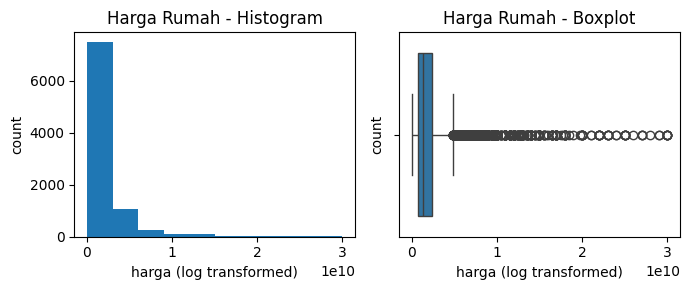

In [308]:
harga_expm1 = np.expm1(df['harga'])
hist_box_plot(harga_expm1, title='Harga Rumah', xlabel='harga (log transformed)', ylabel='count',figx=7,figy=3)


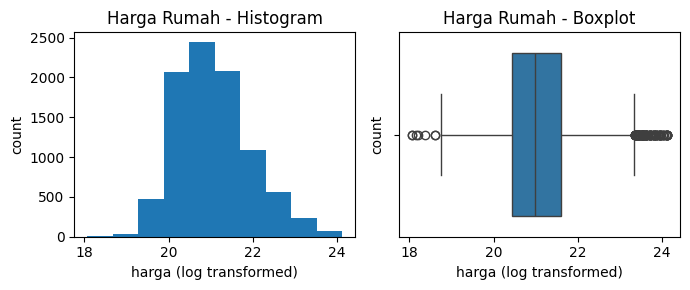

In [309]:
harga_log1p = np.log1p(harga_expm1)
hist_box_plot(harga_log1p, title='Harga Rumah', xlabel='harga (log transformed)', ylabel='count',figx=7,figy=3)

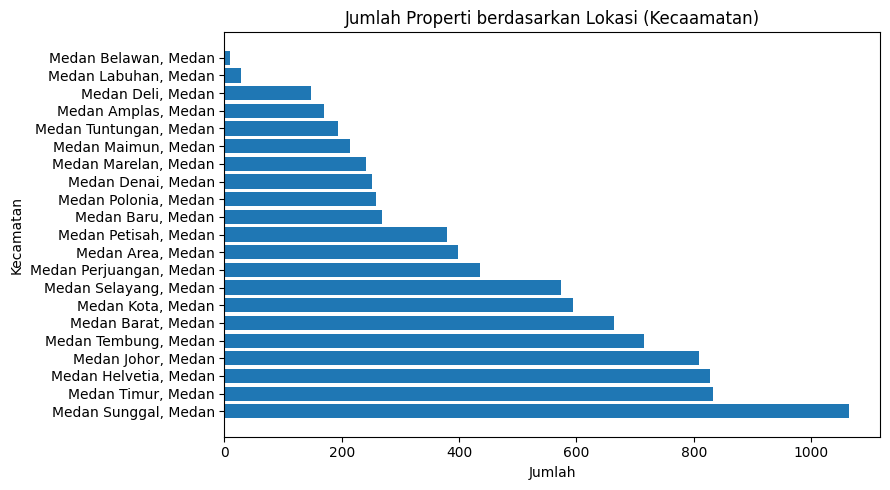

In [310]:
bar_plot(df['lokasi'],figx=9,figy=5,horizontal=True,title='Jumlah Properti berdasarkan Lokasi (Kecaamatan)',xlabel='Jumlah',ylabel='Kecamatan')

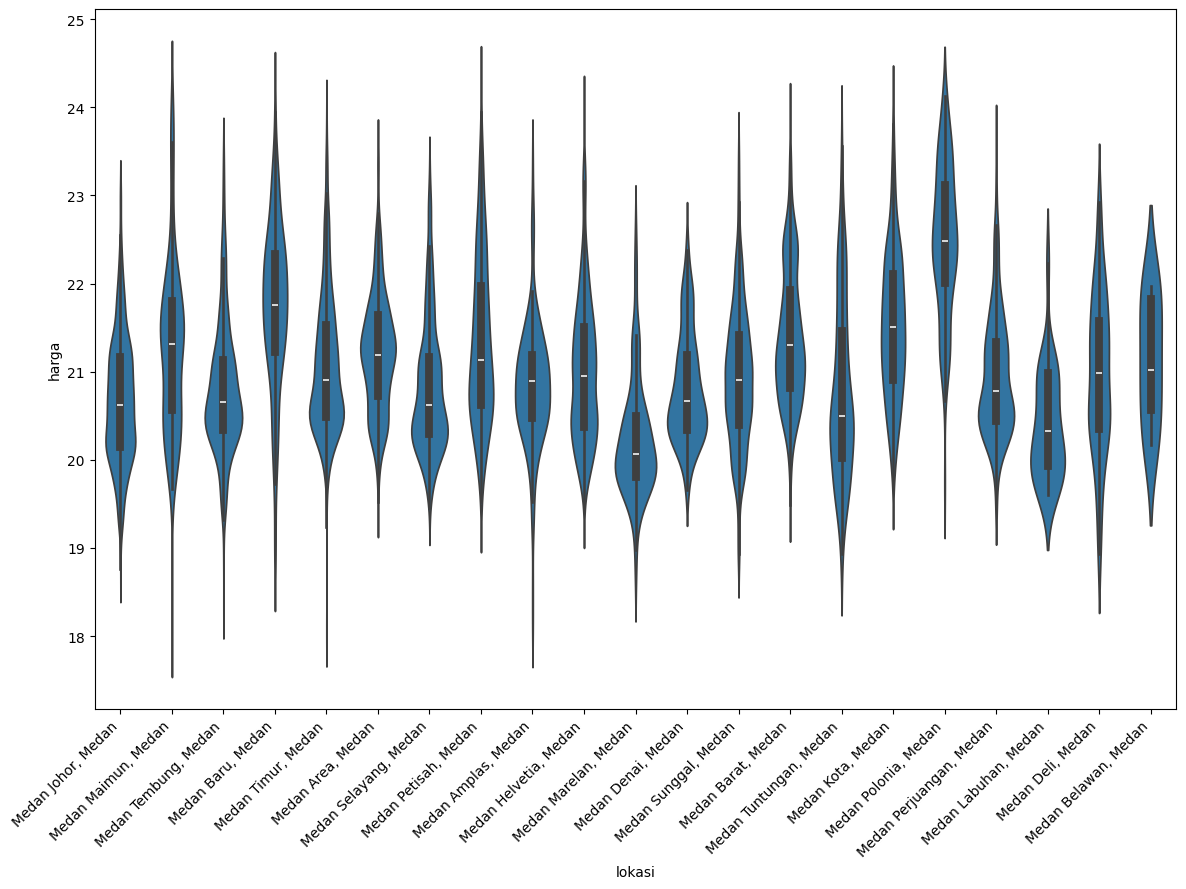

In [311]:
violin_plot(x='lokasi',y='harga',data=df,figx=12,figy=9)

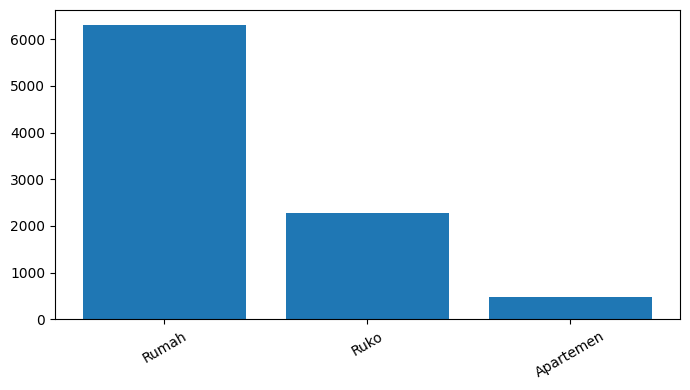

In [312]:
bar_plot(df['jenis_properti'],figx=7,figy=4)

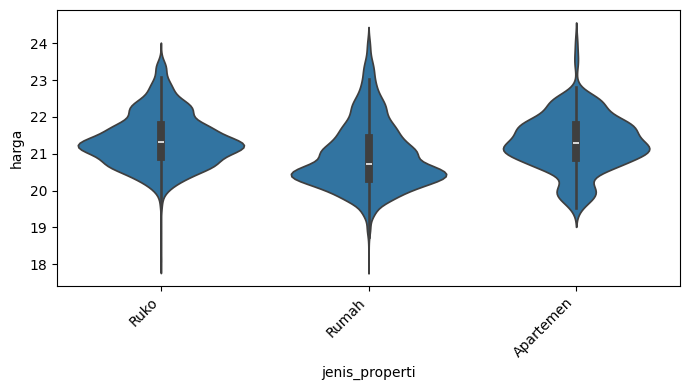

In [313]:
violin_plot(x='jenis_properti',y='harga',data=df,figx=7,figy=4)

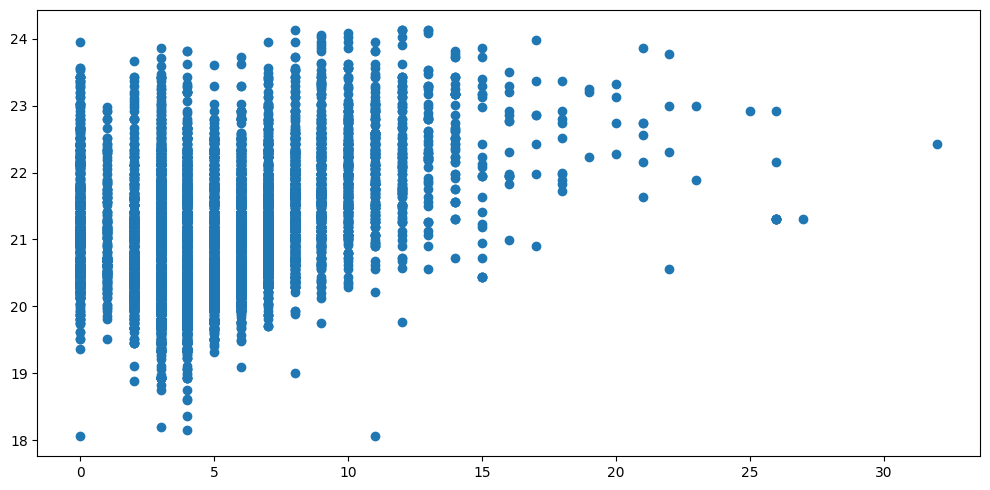

In [314]:
scatter_plot(df['jumlah_kamar_tidur']+df['jumlah_kamar_mandi']+df['garasi'],df['harga'],figx=10,figy=5)

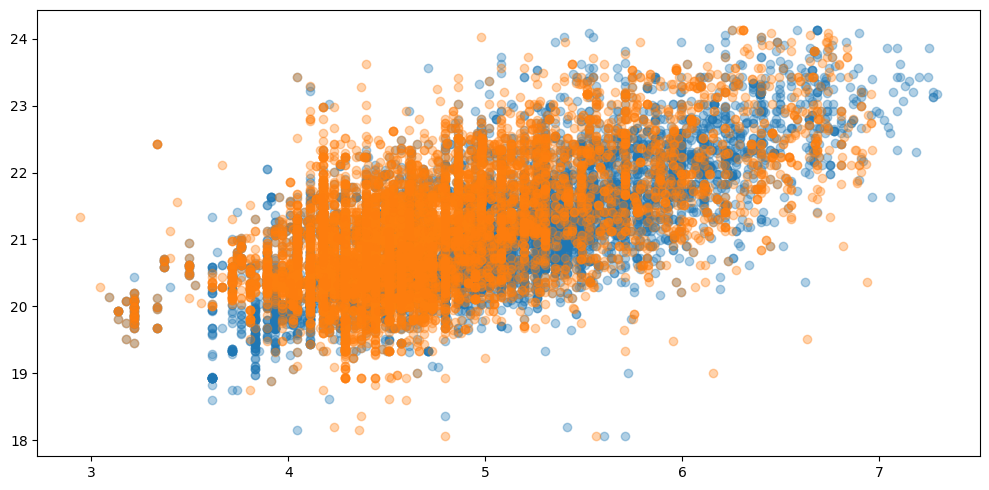

In [315]:
plt.figure(figsize=(10, 5))
plt.scatter(df['luas_bangunan'], df['harga'],alpha=.35)
plt.scatter(df['luas_tanah'], df['harga'],alpha=.35)
plt.tight_layout()
plt.show()


In [ ]:
df['Je']